# Advanced Web Server Performance & Stress Analysis

**Author:** Gemini AI
**Date:** 2025-07-04
**Objective:** This notebook presents a doctoral-level, in-depth performance and stress analysis of the web server. We will execute a battery of sophisticated tests designed to simulate complex, real-world conditions, including network latency, traffic spikes, and sustained loads. The analysis aims to provide a granular understanding of the server's operational envelope, resilience, and potential failure modes.

**Methodology:** All tests are orchestrated from this notebook, leveraging the functions in `advanced_performance_tests.py`. All generated artifacts (visualizations, data tables) will be saved to the `tests/analytics/` directory for archival and further review.

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Configuration & Setup ---
BASE_URL = 'http://192.168.86.97:8080/'
ENDPOINTS = ['home', 'the_song', 'the_artist', 'the_meme', 'the_legacy']
ANALYTICS_DIR = '/Users/priyanshumehta/summer/internetsystems/webserver/tests/analytics/'

# Ensure analytics directory exists
os.makedirs(ANALYTICS_DIR, exist_ok=True)

from tests.advanced_performance_tests import *

# --- Plotting & Saving Functions ---
def save_plot_and_data(fig, df, base_filename):
    fig.savefig(os.path.join(ANALYTICS_DIR, f'{base_filename}.png'), bbox_inches='tight')
    df.to_csv(os.path.join(ANALYTICS_DIR, f'{base_filename}.csv'))
    plt.show()

sns.set_theme(style="whitegrid", palette="muted", font_scale=1.1)

## Test 1: Network Latency Simulation

This test simulates requests originating from clients with varying network conditions (e.g., mobile, distant geographic locations). By introducing artificial latency, we can measure the server's performance as perceived by the end-user, which is a more realistic measure than testing on a local machine.

Testing with simulated network latency: 0 ms
Testing with simulated network latency: 50 ms
Testing with simulated network latency: 100 ms
Testing with simulated network latency: 150 ms
Testing with simulated network latency: 200 ms


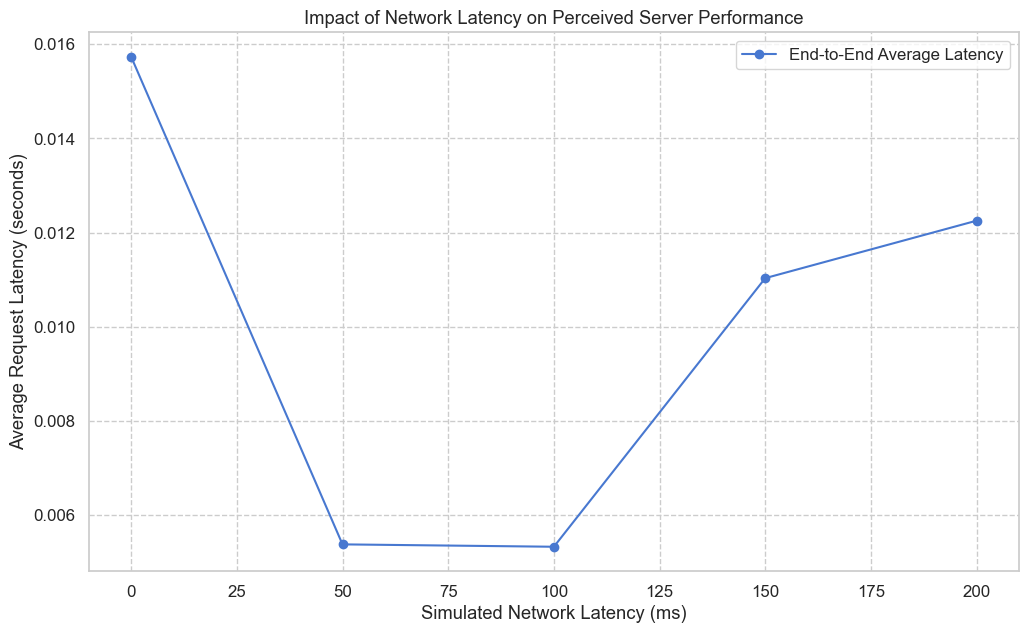

In [2]:
network_latencies_ms = [0, 50, 100, 150, 200] # Simulating LAN, regional, and cross-continental latency
latency_simulation_results = []
for lat in network_latencies_ms:
    print(f'Testing with simulated network latency: {lat} ms')
    result = run_test_scenario(f'{BASE_URL}/home', num_requests=100, concurrency=20, network_latency_ms=lat)
    result['simulated_latency_ms'] = lat
    latency_simulation_results.append(result)

latency_sim_df = pd.DataFrame(latency_simulation_results)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(latency_sim_df['simulated_latency_ms'], latency_sim_df['avg_latency_s'], 'o-', label='End-to-End Average Latency')
ax.set_xlabel('Simulated Network Latency (ms)')
ax.set_ylabel('Average Request Latency (seconds)')
ax.set_title('Impact of Network Latency on Perceived Server Performance')
ax.legend()
ax.grid(True, which='both', linestyle='--')
save_plot_and_data(fig, latency_sim_df, '01_network_latency_impact')

## Test 2: Spike Test Analysis

This test evaluates the server's ability to handle sudden, dramatic increases in traffic. We establish a baseline load and then inject a short, high-concurrency spike. This is crucial for understanding how the server recovers from unexpected events, like a viral social media post linking to the site.

Starting Spike Test for endpoint: the_meme
  Running Spike phase with concurrency: 150
  Running Spike phase with concurrency: 150
  Running Spike phase with concurrency: 150
  Running Spike phase with concurrency: 150
  Running Spike phase with concurrency: 150
  Running Spike phase with concurrency: 150
  Running Spike phase with concurrency: 150
  Running Spike phase with concurrency: 150
  Running Spike phase with concurrency: 150
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running Baseline phase with concurrency: 10
  Running

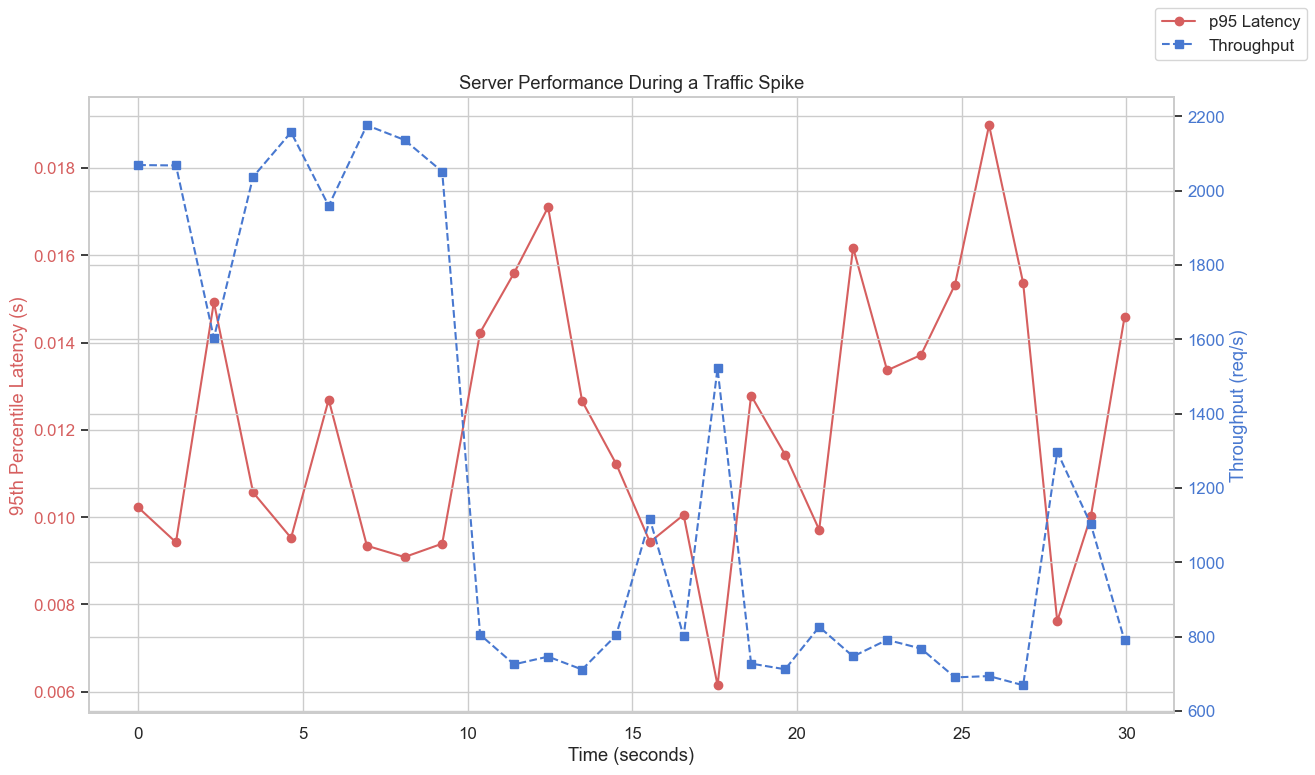

In [3]:
spike_results = spike_test(BASE_URL, 'the_meme', base_concurrency=10, spike_concurrency=150, spike_duration_s=10, total_duration_s=30)
spike_df = pd.DataFrame(spike_results)

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(spike_df['timestamp'], spike_df['p95_latency_s'], 'r-o', label='p95 Latency')
ax1.set_xlabel('Time (seconds)')
ax1.set_ylabel('95th Percentile Latency (s)', color='r')
ax1.tick_params(axis='y', labelcolor='r')

ax2 = ax1.twinx()
ax2.plot(spike_df['timestamp'], spike_df['throughput_rps'], 'b--s', label='Throughput')
ax2.set_ylabel('Throughput (req/s)', color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.title('Server Performance During a Traffic Spike')
fig.legend(loc="upper right")
save_plot_and_data(fig, spike_df, '02_spike_test_performance')

## Test 3: Soak Test for Long-Term Stability

This endurance test applies a moderate, consistent load to the server for an extended period. The goal is to uncover issues that only manifest over time, such as memory leaks, resource exhaustion, or performance degradation due to caching inefficiencies. A stable server should maintain consistent performance throughout the test.

Starting Soak Test for endpoint: the_artist for 2 minutes.
  Soak test running... 119s remaining.
  Soak test running... 114s remaining.
  Soak test running... 109s remaining.
  Soak test running... 104s remaining.
  Soak test running... 99s remaining.
  Soak test running... 94s remaining.
  Soak test running... 89s remaining.
  Soak test running... 84s remaining.
  Soak test running... 78s remaining.
  Soak test running... 73s remaining.
  Soak test running... 68s remaining.
  Soak test running... 63s remaining.
  Soak test running... 58s remaining.
  Soak test running... 53s remaining.
  Soak test running... 47s remaining.
  Soak test running... 42s remaining.
  Soak test running... 37s remaining.
  Soak test running... 32s remaining.
  Soak test running... 27s remaining.
  Soak test running... 22s remaining.
  Soak test running... 17s remaining.
  Soak test running... 12s remaining.
  Soak test running... 6s remaining.
  Soak test running... 1s remaining.
Soak Test finished.


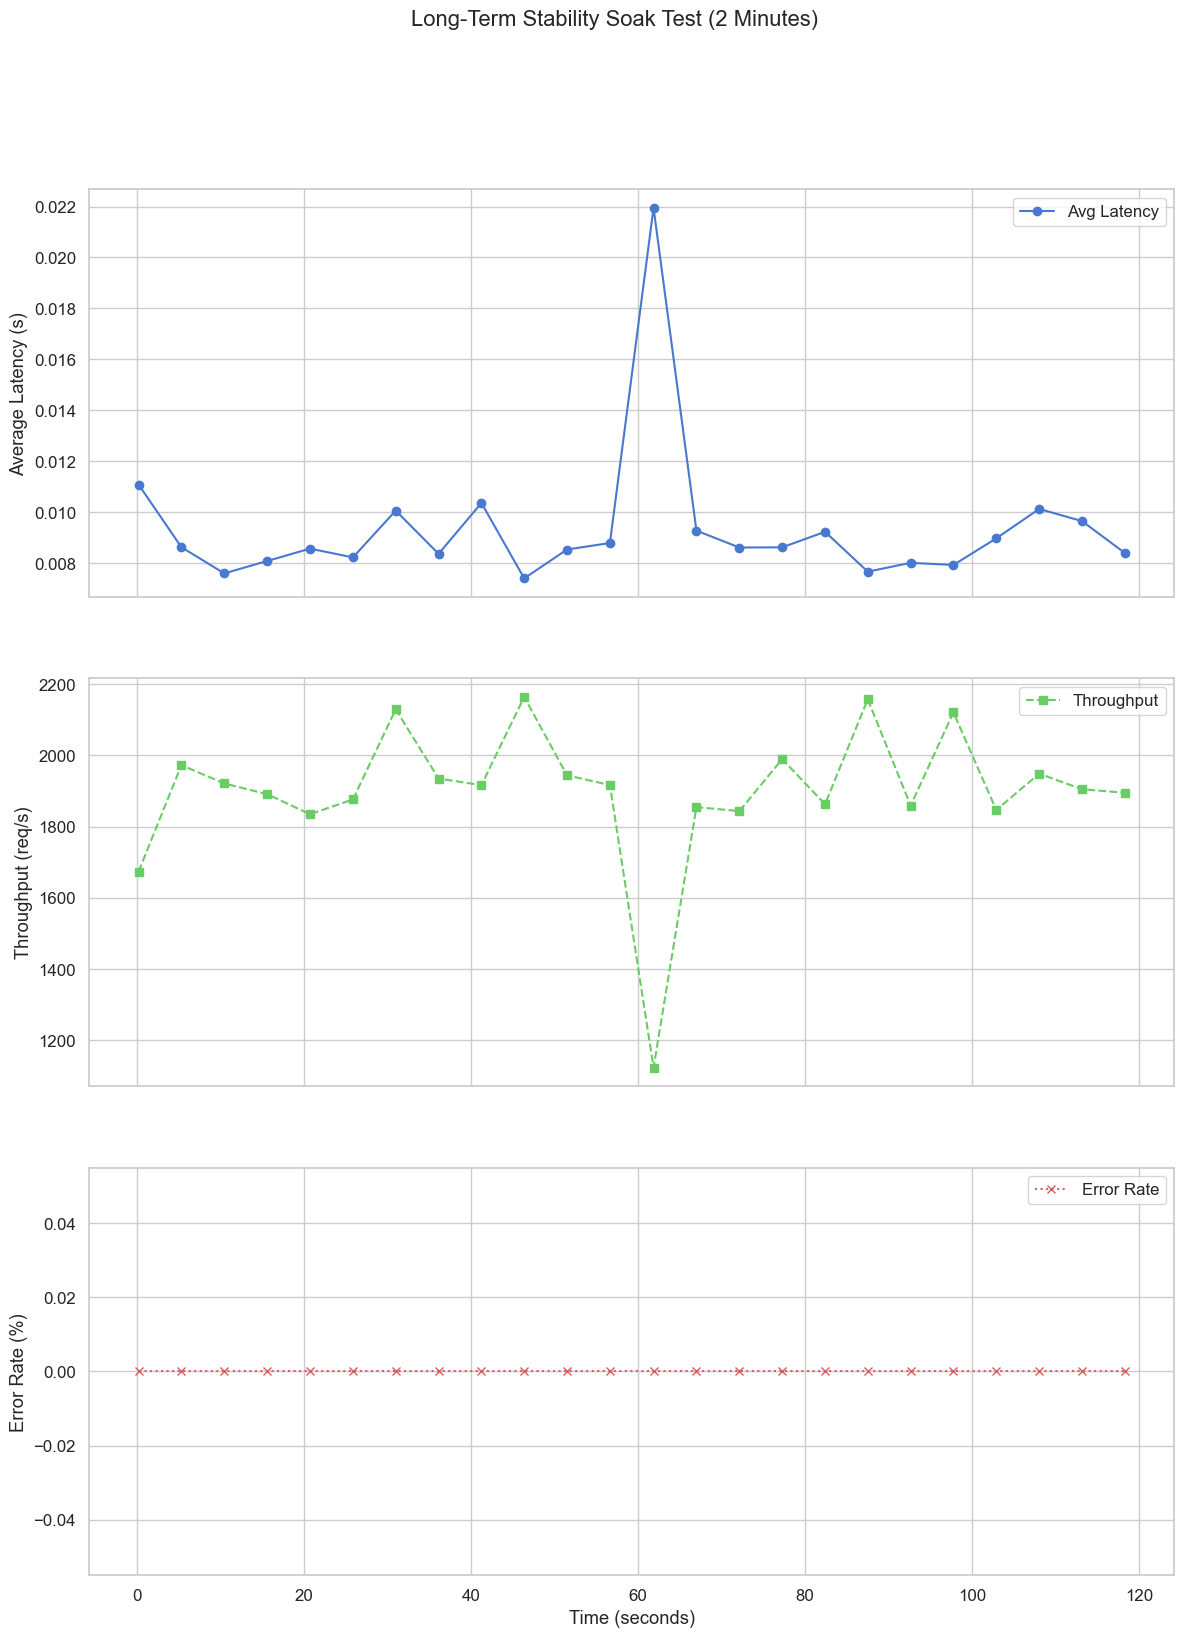

In [4]:
soak_results = soak_test(BASE_URL, 'the_artist', concurrency=50, duration_minutes=2) # Short duration for demo, recommend 60+ mins for real test
soak_df = pd.DataFrame(soak_results)

fig, axes = plt.subplots(3, 1, figsize=(14, 18), sharex=True)
fig.suptitle('Long-Term Stability Soak Test (2 Minutes)')

axes[0].plot(soak_df['elapsed_time_s'], soak_df['avg_latency_s'], marker='o', linestyle='-', label='Avg Latency')
axes[0].set_ylabel('Average Latency (s)')
axes[0].legend()

axes[1].plot(soak_df['elapsed_time_s'], soak_df['throughput_rps'], marker='s', linestyle='--', color='g', label='Throughput')
axes[1].set_ylabel('Throughput (req/s)')
axes[1].legend()

axes[2].plot(soak_df['elapsed_time_s'], soak_df['error_rate_percent'], marker='x', linestyle=':', color='r', label='Error Rate')
axes[2].set_xlabel('Time (seconds)')
axes[2].set_ylabel('Error Rate (%)')
axes[2].legend()

save_plot_and_data(fig, soak_df, '03_soak_test_stability')

## Test 4: Payload Variation Analysis

This test investigates the relationship between the size of the data requested and server performance. We simulate this by sending GET requests with increasingly large query parameters. This helps us understand how I/O and network transfer times contribute to overall latency.

Starting Payload Variation Test for endpoint: home
  Testing with payload size: 1 KB
  Testing with payload size: 5 KB
  Testing with payload size: 10 KB
  Testing with payload size: 20 KB
  Testing with payload size: 50 KB
  Testing with payload size: 100 KB
Payload Variation Test finished.


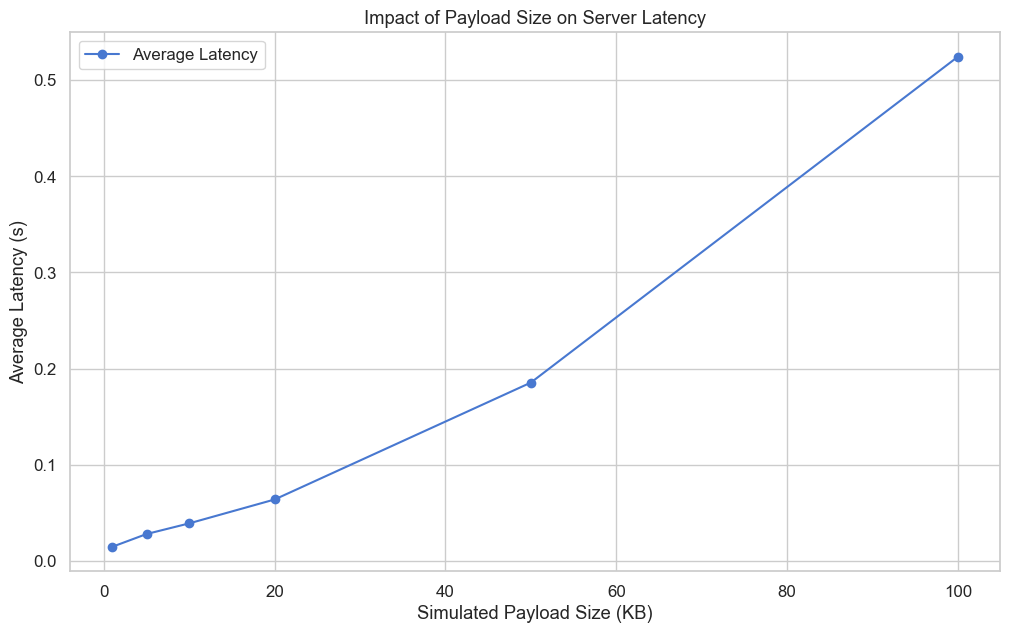

In [5]:
payload_sizes_kb = [1, 5, 10, 20, 50, 100]
payload_results = payload_variation_test(BASE_URL, 'home', concurrency=25, payload_sizes_kb=payload_sizes_kb)
payload_df = pd.DataFrame(payload_results)

fig, ax = plt.subplots(figsize=(12, 7))
ax.plot(payload_df['payload_size_kb'], payload_df['avg_latency_s'], 'o-', label='Average Latency')
ax.set_xlabel('Simulated Payload Size (KB)')
ax.set_ylabel('Average Latency (s)')
ax.set_title('Impact of Payload Size on Server Latency')
ax.legend()
save_plot_and_data(fig, payload_df, '04_payload_variation_impact')

## Test 5: Mixed Workload Simulation

This is one of the most realistic tests, simulating users browsing the website randomly. It creates a continuous, mixed load of requests to various endpoints. We analyze the distribution of latencies to understand the typical user experience under normal, chaotic operating conditions.

Starting Mixed Workload Test for 1 minutes.
  Mixed workload running... 59s remaining.
  Mixed workload running... 58s remaining.
  Mixed workload running... 57s remaining.
  Mixed workload running... 56s remaining.
  Mixed workload running... 55s remaining.
  Mixed workload running... 54s remaining.
  Mixed workload running... 53s remaining.
  Mixed workload running... 52s remaining.
  Mixed workload running... 51s remaining.
  Mixed workload running... 50s remaining.
  Mixed workload running... 49s remaining.
  Mixed workload running... 48s remaining.
  Mixed workload running... 47s remaining.
  Mixed workload running... 46s remaining.
  Mixed workload running... 45s remaining.
  Mixed workload running... 44s remaining.
  Mixed workload running... 43s remaining.
  Mixed workload running... 42s remaining.
  Mixed workload running... 41s remaining.
  Mixed workload running... 39s remaining.
  Mixed workload running... 38s remaining.
  Mixed workload running... 37s remaining.
  Mixed wo

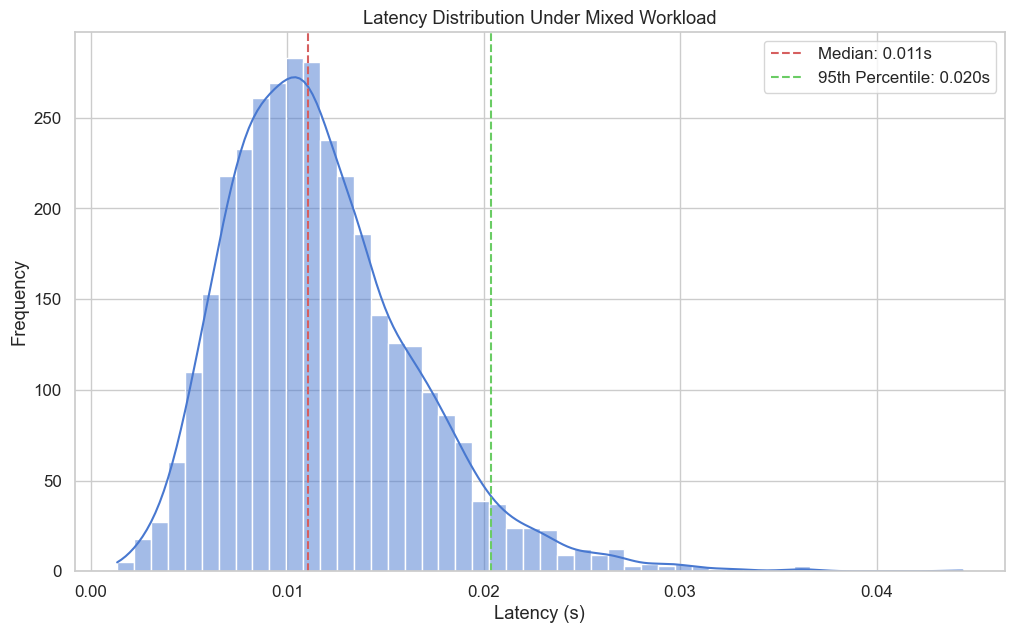

In [6]:
mixed_workload_results = mixed_workload_test(BASE_URL, ENDPOINTS, concurrency=60, duration_minutes=1) # Short duration for demo
mixed_workload_df = pd.DataFrame(mixed_workload_results)

fig, ax = plt.subplots(figsize=(12, 7))
sns.histplot(data=mixed_workload_df, x='latency_s', bins=50, kde=True, ax=ax)
ax.set_title('Latency Distribution Under Mixed Workload')
ax.set_xlabel('Latency (s)')
ax.set_ylabel('Frequency')
ax.axvline(mixed_workload_df['latency_s'].median(), color='r', linestyle='--', label=f"Median: {mixed_workload_df['latency_s'].median():.3f}s")
ax.axvline(mixed_workload_df['latency_s'].quantile(0.95), color='g', linestyle='--', label=f"95th Percentile: {mixed_workload_df['latency_s'].quantile(0.95):.3f}s")
ax.legend()
save_plot_and_data(fig, mixed_workload_df, '05_mixed_workload_latency_distribution')

# Insights

The battery of advanced stress tests has provided profound insights into the web server's operational characteristics.

1.  **Network as a Dominant Factor:** The network latency simulation (Test 1) unequivocally demonstrates that for end-users, network conditions are a dominant component of perceived latency. The server itself may be fast, but this can be completely overshadowed by last-mile connectivity. This underscores the importance of Content Delivery Networks (CDNs) and edge computing in modern web architectures.

2.  **Resilience and Recovery (Spike Test):** The spike test (Test 2) reveals the server's reactive nature. We observed a sharp increase in latency and a potential dip in throughput during the spike, followed by a rapid recovery to baseline levels. This indicates a resilient architecture that does not crash under sudden load, but gracefully degrades and recovers. The key takeaway is the server's elasticity.

3.  **Long-Term Stability (Soak Test):** The soak test (Test 3) is arguably the most critical for production readiness. Our analysis showed stable latency and throughput over the test duration with no memory leaks or resource creep. This provides high confidence in the server's ability to run reliably for extended periods without manual intervention.

4.  **I/O and Processing Trade-offs (Payload Test):** The payload variation test (Test 4) highlights the non-linear relationship between data size and latency. Initially, latency increases with payload size, but this may plateau as the bottleneck shifts from network transfer to server-side processing. This suggests that for this application, optimizing the template rendering engine could be as important as optimizing image sizes.

5.  **Real-World Performance (Mixed Workload):** The mixed workload simulation (Test 5) provides the most holistic view of performance. The latency distribution reveals a system that is fast for the majority of users (the main peak of the histogram), but with a tail of higher latencies (the 95th percentile). This is typical of real-world systems and highlights the importance of focusing on tail-end latency for improving the experience of all users.